<a href="https://colab.research.google.com/github/aiswarya-joseph-08/Project-of-ML/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
Educational institutions struggle to identify students who are at risk of poor academic performance early. This project predicts student performance using historical academic and behavioural data to support timely intervention

#  **Column Name**               - **Description**                                                                                                                                                     

- **Attendance_Percentage**     - Percentage of classes attended by the student during the semester (range: 40–100). Higher attendance generally indicates better engagement and academic discipline.
- **Internal_Assessment_Marks** - Marks obtained in internal assessments such as quizzes, assignments, and mid-term exams (range: 30–100). Reflects continuous academic performance.                  
- **Previous_Sem_Grade**        - Grade obtained in the previous semester (A, B, C, D, E, F). Acts as a strong indicator of past academic consistency.                                                
- **Study_Hours_Per_Week**      - Average number of hours the student spends studying per week (range: 1–19). Higher study hours usually correlate with better performance.                           
- **Activity_Participation**    - Indicates whether the student actively participates in extracurricular or co-curricular activities (Yes/No). Helps assess overall engagement and time management.   
- **Socio_Economic_Status**     - Economic background of the student categorized as Low, Medium, or High. This may influence access to educational resources.                                         
- **Performance**               - **Target variable** indicating overall student performance: **1 = Good performance**, **0 = Poor performance**. Derived based on academic and behavioral factors.   


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/student_performance_100k.csv")
df

,Attendance_Percentage,Internal_Assessment_Marks,Previous_Sem_Grade,Study_Hours_Per_Week,Activity_Participation,Socio_Economic_Status,Performance
0,78,87,B,7,Yes,Low,0
1,91,41,A,18,Yes,Low,0
2,68,42,C,4,No,Medium,0
3,54,41,C,4,No,High,0
4,82,67,B,1,No,High,0
...,...,...,...,...,...,...,...
99995,94,50,A,15,No,Medium,0
99996,46,32,B,14,Yes,Medium,0
99997,91,52,E,9,Yes,Medium,0
99998,82,53,A,17,No,Low,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Attendance_Percentage      100000 non-null  int64 
 1   Internal_Assessment_Marks  100000 non-null  int64 
 2   Previous_Sem_Grade         100000 non-null  object
 3   Study_Hours_Per_Week       100000 non-null  int64 
 4   Activity_Participation     100000 non-null  object
 5   Socio_Economic_Status      100000 non-null  object
 6   Performance                100000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [7]:
df.isnull().sum()

,0
Attendance_Percentage,0
Internal_Assessment_Marks,0
Previous_Sem_Grade,0
Study_Hours_Per_Week,0
Activity_Participation,0
Socio_Economic_Status,0
Performance,0


In [8]:
df.duplicated().sum()

np.int64(2323)

In [9]:
df.shape

(100000, 7)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(97677, 7)

In [12]:
print(df['Previous_Sem_Grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F']


In [13]:
df["Previous_Sem_Grade"].replace(['A','B','C','D','E','F'],[1,2,3,4,5,6],inplace=True)

/tmp/ipython-input-3551681270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Previous_Sem_Grade"].replace(['A','B','C','D','E','F'],[1,2,3,4,5,6],inplace=True)
/tmp/ipython-input-3551681270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Previous_Sem_Grade"].replace(['A','B','C','D'

In [14]:
df

,Attendance_Percentage,Internal_Assessment_Marks,Previous_Sem_Grade,Study_Hours_Per_Week,Activity_Participation,Socio_Economic_Status,Performance
0,78,87,2,7,Yes,Low,0
1,91,41,1,18,Yes,Low,0
2,68,42,3,4,No,Medium,0
3,54,41,3,4,No,High,0
4,82,67,2,1,No,High,0
...,...,...,...,...,...,...,...
99995,94,50,1,15,No,Medium,0
99996,46,32,2,14,Yes,Medium,0
99997,91,52,5,9,Yes,Medium,0
99998,82,53,1,17,No,Low,0


In [15]:
print(df['Socio_Economic_Status'].unique())

['Low' 'Medium' 'High']


In [16]:
df["Socio_Economic_Status"].replace(['Low','Medium','High'],[1,2,3],inplace=True)

/tmp/ipython-input-1532745085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Socio_Economic_Status"].replace(['Low','Medium','High'],[1,2,3],inplace=True)
/tmp/ipython-input-1532745085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Socio_Economic_Status"].replace(['Low','Medium','H

<Axes: >

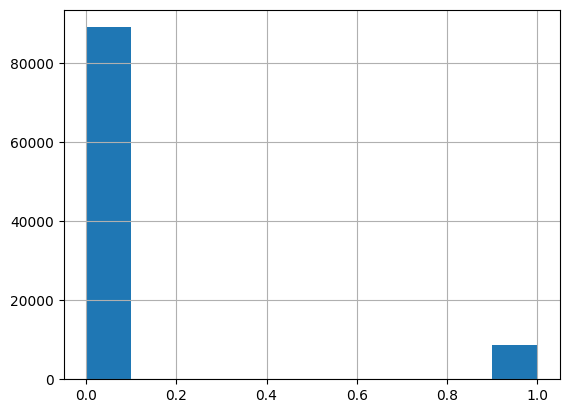

In [17]:
df["Performance"].hist()

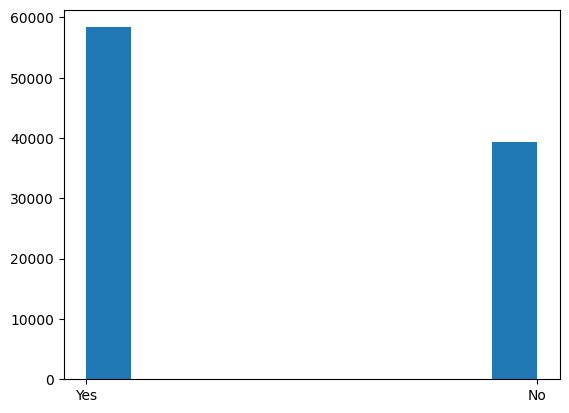

In [18]:
plt.hist(df['Activity_Participation'])
plt.show()

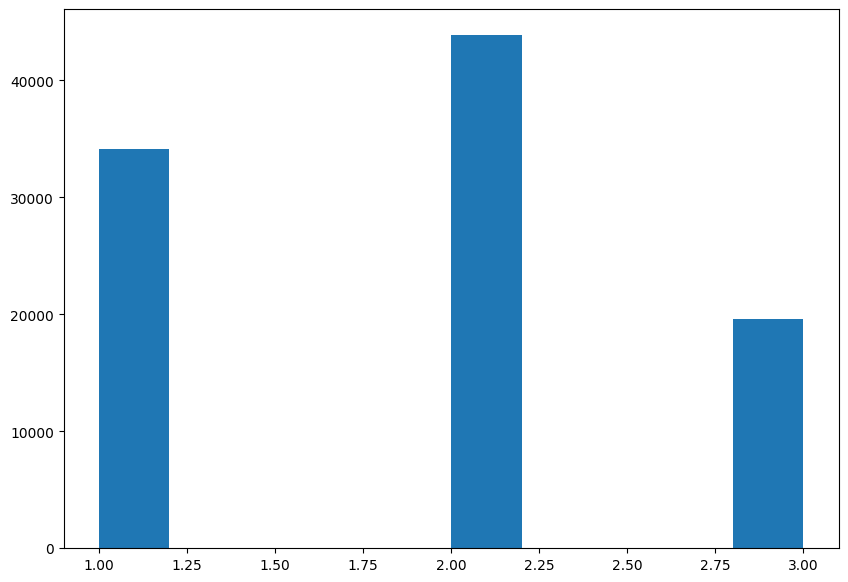

In [19]:
plt.figure(figsize=(10,7))
plt.hist(df['Socio_Economic_Status'])

plt.show()

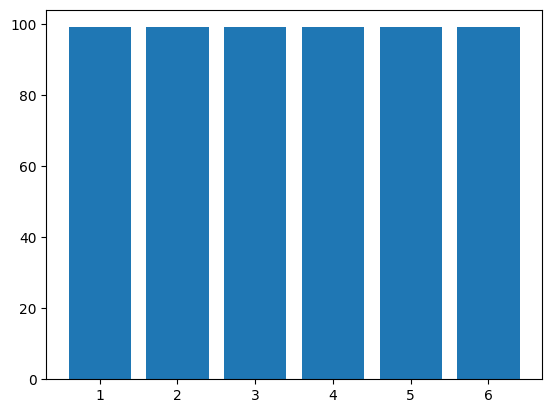

In [20]:
plt.bar(df["Previous_Sem_Grade"],df['Internal_Assessment_Marks'])
plt.show()

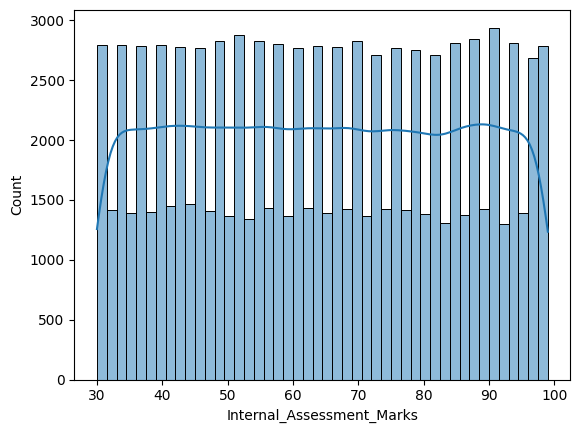

In [21]:
sns.histplot(df["Internal_Assessment_Marks"],kde=True)
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Activity_Participation'] = le.fit_transform(df['Activity_Participation'])

In [23]:
df

,Attendance_Percentage,Internal_Assessment_Marks,Previous_Sem_Grade,Study_Hours_Per_Week,Activity_Participation,Socio_Economic_Status,Performance
0,78,87,2,7,1,1,0
1,91,41,1,18,1,1,0
2,68,42,3,4,0,2,0
3,54,41,3,4,0,3,0
4,82,67,2,1,0,3,0
...,...,...,...,...,...,...,...
99995,94,50,1,15,0,2,0
99996,46,32,2,14,1,2,0
99997,91,52,5,9,1,2,0
99998,82,53,1,17,0,1,0


In [24]:
x=df[['Attendance_Percentage','Internal_Assessment_Marks','Previous_Sem_Grade','Study_Hours_Per_Week','Activity_Participation','Socio_Economic_Status']]
y=df['Performance']

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x,y)

In [26]:
train_df = pd.concat(
    [
        pd.DataFrame(x_train_smote, columns=x.columns),
        pd.Series(y_train_smote, name='Performance')
    ],
    axis=1
)

In [27]:
train_df.head()
train_df.shape
train_df['Performance'].value_counts()

,count
Performance,
0,89043
1,89043


In [28]:
train_df

,Attendance_Percentage,Internal_Assessment_Marks,Previous_Sem_Grade,Study_Hours_Per_Week,Activity_Participation,Socio_Economic_Status,Performance
0,78,87,2,7,1,1,0
1,91,41,1,18,1,1,0
2,68,42,3,4,0,2,0
3,54,41,3,4,0,3,0
4,82,67,2,1,0,3,0
...,...,...,...,...,...,...,...
178081,75,69,1,13,0,3,1
178082,84,93,1,16,1,2,1
178083,70,66,1,18,1,1,1
178084,78,91,2,10,0,1,1


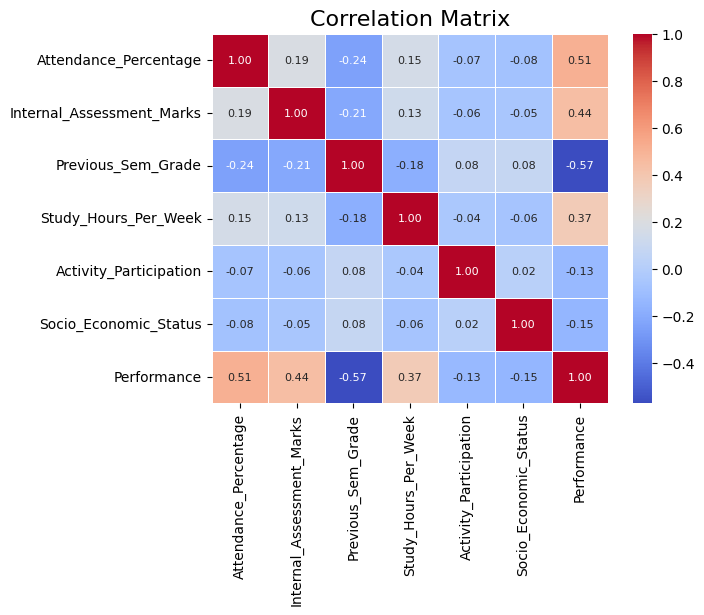

In [29]:
corr_matrix =train_df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title('Correlation Matrix', fontsize=16)
plt.show()

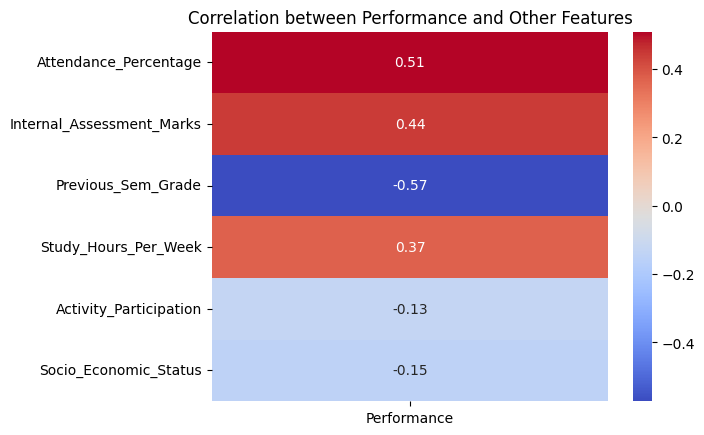

In [30]:
stud_corr = train_df.corr()['Performance']

stud_corr = stud_corr.drop('Performance')
sns.heatmap(stud_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True,annot_kws={'size': 10})
plt.title('Correlation between Performance and Other Features')
plt.show()

In [31]:
train_df.drop(['Activity_Participation','Socio_Economic_Status'],axis=1,inplace=True)

**LogisticRegression**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
x=train_df[['Attendance_Percentage','Internal_Assessment_Marks','Previous_Sem_Grade','Study_Hours_Per_Week']]
y=train_df['Performance']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.91


**DecisionTreeClassifier**

In [35]:
x=train_df[['Attendance_Percentage','Internal_Assessment_Marks','Previous_Sem_Grade','Study_Hours_Per_Week']]
y=train_df['Performance']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 1.00


**RandomForest**

In [36]:
x=train_df[['Attendance_Percentage','Internal_Assessment_Marks','Previous_Sem_Grade','Study_Hours_Per_Week']]
y=train_df['Performance']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

**SVC**

In [37]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.9058443016935448

In [38]:
model.predict([[75,69,1,13]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model=Sequential()
model.add(Dense(64,input_dim=4,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8899 - loss: 0.3995
Epoch 2/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9539 - loss: 0.1195
Epoch 3/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9590 - loss: 0.1065
Epoch 4/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9636 - loss: 0.0957
Epoch 5/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9738 - loss: 0.0690
Epoch 6/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9801 - loss: 0.0545
Epoch 7/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9817 - loss: 0.0522
Epoch 8/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9844 - loss: 0.0426
Epoch 9/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9863 - loss: 0.0394
Epoch 10/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9871 - loss: 0.0364
Epoch 11/20
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9880 - loss: 0.0349
Epoch 12/20
4174/4174 ━

In [42]:
probs=model.predict(np.expand_dims(x_test.iloc[0],axis=0))
pred_classes=np.round(probs).astype(int)

print('probabilities:\n',probs.flatten())
print()
print('predicted classes(by rounding):',pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
probabilities:
 [0.99999946]

predicted classes(by rounding): [1]


In [43]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Model Accuracy:{accuracy * 100:.2f}%")

1392/1392 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0278
Model Accuracy:99.33%


# Conclusion

The machine learning and deep learning models successfully predicted student performance with very high accuracy, reaching up to 99.53%. The results show that attendance, internal assessment marks, study hours, and previous academic performance are the most important factors influencing student success. The developed model can be effectively used to identify students at risk and help educators take early intervention measures to improve academic outcomes.

In [46]:
import pickle
with open('performance.model.pkl','wb')as file:
  pickle.dump(model,file)


In [47]:
import pickle
with open('performance.model.pkl','rb')as file:
  loaded_model= pickle.load(file)

In [48]:
with open('/content/performance.model.pkl','rb') as file:
  load_model=pickle.load(file)